# Semiconductor Devices with Python

## Goals of this course

- To develop in the student the principles of operation of the diode, transistor and operational amplifier, and the operation of some basic circuits that involve them.
- To transfer to the student the knowledge of the design techniques of basic electronic systems based on diodes, transistors and operational amplifiers.
- To develop the techniques and skills for the design of control schemes for electronic circuits that require control signals.
- To allow the student to discern the most adequate solution to solve an open problem using basic electronics.

## Schedule:

- Getting started
- Python basics and IPython Notebook interactive development environment
- Diode
  + _Rectifiers_
  + _Other uses_
- Transistor
  + _Switching_
  + _Amplifiers_
- Operational Amplifier
  + _Linear applications_
  + _Nonlinear applications_
- Validation and testing of models
- Course evaluation

In [1]:
# Ejecutar solo en Colab, conecta Drive a maquina virtual
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Crea variable con el path a carpeta de imagenes
colab_path = '/content/drive/My Drive/Colab Notebooks/devices/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Utilizar uno de los dos dependiendo de la plataforma

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

## Clase 4: Rectificadores

**Rectificación**: Proceso de convertir una señal alterna (AC) en una con una sola dirección o directa.

La señal alterna tiene dos semiciclos (positivo y negativo), la rectificación se clasifica de acuerdo a la cantidad que toma de estos ciclos: media onda u onda completa.

### Rectificador de media onda

In [11]:
from IPython.display import SVG
SVG(valid_path + 'fig31.svg')

Output hidden; open in https://colab.research.google.com to view.

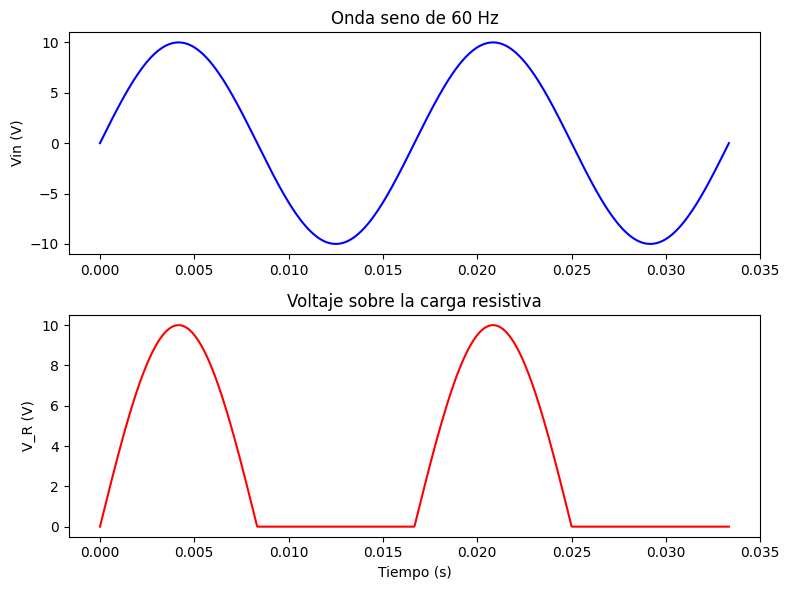

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las características de la señal
frecuencia = 60  # Hz
amplitud = 10  # V
periodo = 1/frecuencia  # s
tiempo = np.linspace(0, 2*periodo, 1000)  # Generamos valores de tiempo para dos periodos

# Calculamos la onda seno
onda_seno = amplitud * np.sin(2 * np.pi * frecuencia * tiempo)

# Creamos una copia de la onda seno y la modificamos para que muestre cero en las partes negativas
onda_modificada = np.where(onda_seno > 0, onda_seno, 0)

# Creamos las gráficas
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de onda seno
ax[0].plot(tiempo, onda_seno, color='blue')
ax[0].set_title("Onda seno de 60 Hz")
ax[0].set_ylabel("Vin (V)")

# Gráfica del valor modificado de la onda seno
ax[1].plot(tiempo, onda_modificada, color='red')
ax[1].set_title("Voltaje sobre la carga resistiva")
ax[1].set_xlabel("Tiempo (s)")
ax[1].set_ylabel("V_R (V)")

# Ajustamos el espacio entre gráficas para mejor visualización
plt.tight_layout()

# Mostramos las gráficas
plt.show()

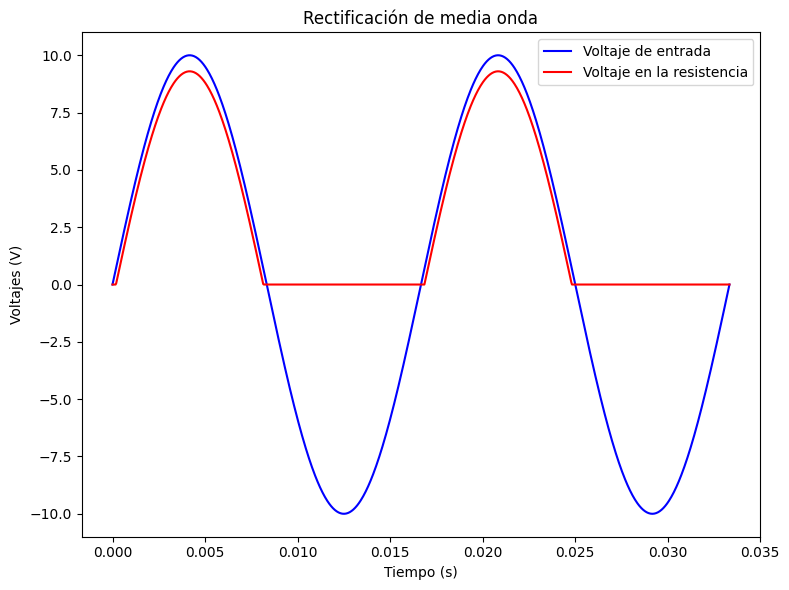

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las características de la señal
frecuencia = 60  # Hz
amplitud = 10  # V
periodo = 1/frecuencia  # s
tiempo = np.linspace(0, 2*periodo, 1000)  # Generamos valores de tiempo para dos periodos

# Calculamos la onda seno
onda_seno = amplitud * np.sin(2 * np.pi * frecuencia * tiempo)

# Creamos una copia de la onda seno y la modificamos para que muestre cero en las partes negativas
# Luego le restamos la constante de 0.7
onda_modificada = np.where(onda_seno - 0.7 > 0, onda_seno - 0.7, 0.)

# Creamos la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfica de onda seno en azul
ax.plot(tiempo, onda_seno, color='blue', label='Voltaje de entrada')

# Gráfica del valor modificado de la onda seno en rojo
ax.plot(tiempo, onda_modificada, color='red', label='Voltaje en la resistencia')

ax.set_title("Rectificación de media onda")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Voltajes (V)")
ax.legend(loc='upper right')

# Mostramos la gráfica
plt.tight_layout()
plt.savefig(valid_path + 'fig32a.svg', dpi=300, format='svg') # Guardar copia en archivo
plt.show()

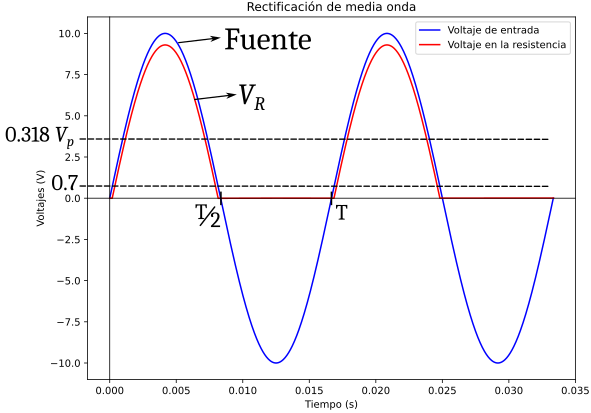

In [19]:
from IPython.display import SVG
SVG(valid_path + 'fig32.svg')

$$V_{prom}=0.318~V_{pico} → (V_{pico}-0.7)$$

¿Cómo se calcula?

$ → $ Integral del seno entre 0 y $T / 2$!

$→$ **Ejercicio:** Dibujar las formas de onda cuando el diodo se invierte.

### Rectificador de onda completa con transformador

In [29]:
from IPython.display import SVG
SVG(valid_path + 'fig33.svg')

Output hidden; open in https://colab.research.google.com to view.

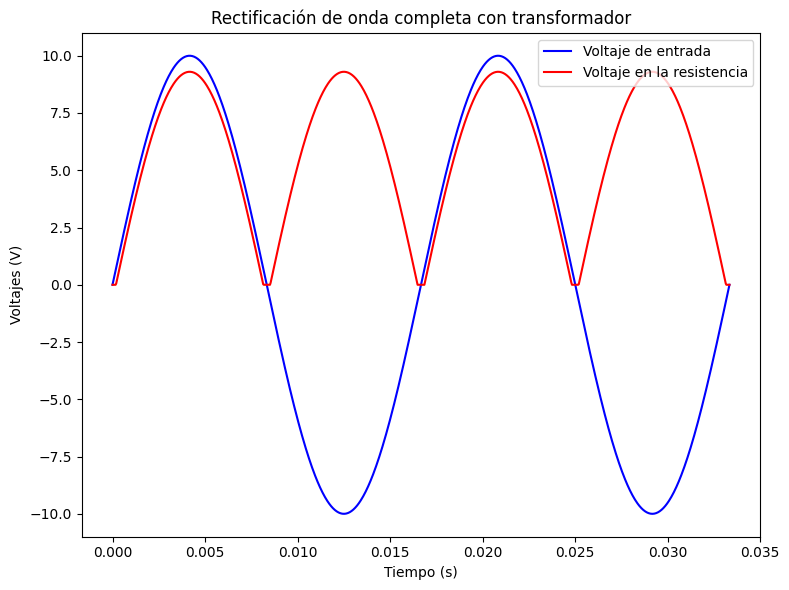

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las características de la señal
frecuencia = 60  # Hz
amplitud = 10  # V
periodo = 1/frecuencia  # s
tiempo = np.linspace(0, 2*periodo, 1000)  # Generamos valores de tiempo para dos periodos

# Calculamos la onda seno
onda_seno = amplitud * np.sin(2 * np.pi * frecuencia * tiempo)

# Creamos una copia de la onda seno y la modificamos para que muestre las partes negativas
# Luego le restamos la constante de 0.7
onda_absoluta = np.abs(onda_seno) - 0.7
onda_modificada = np.where(onda_absoluta < 0, 0, onda_absoluta)

# Creamos la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfica de onda seno en azul
ax.plot(tiempo, onda_seno, color='blue', label='Voltaje de entrada')

# Gráfica del valor modificado de la onda seno en rojo
ax.plot(tiempo, onda_modificada, color='red', label='Voltaje en la resistencia')

ax.set_title("Rectificación de onda completa con transformador")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Voltajes (V)")
ax.legend(loc='upper right')

# Mostramos la gráfica
plt.tight_layout()
#plt.savefig(valid_path + 'fig33a.svg', dpi=300, format='svg') # Guardar copia en archivo
plt.show()

$$V_{prom}=0.636~V_{pico} → (V_{pico}-0.7)$$

### Rectificador de onda completa en puente (puente rectificador)

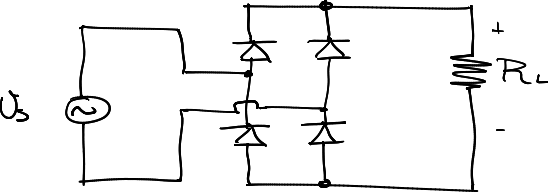

In [31]:
from IPython.display import SVG
SVG(valid_path + 'fig34.svg')

$$V_{prom}=0.636~V_{pico} → (V_{pico}-2 \times 0.7)$$

**Próxima clase:** Simulación